In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get the data from yfinance 
import yfinance as yf

# Get the data of the cryptocurrency btc
data = yf.download('BTC-USD','2020-01-01','2021-01-01')

data


/Users/oattao/Desktop/learn_trad/learntrad/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774


In [3]:
data['returns'] = data['Adj Close'].pct_change()  # คำนวณผลตอบแทนรายวัน

In [4]:
data['buy_and_hold'] = (1 + data['returns']).cumprod() # คำนวณผลตอบแทนของการซื้อและถือ

In [5]:
data['position'] = np.random.choice([1,0], size=len(data)) # สร้างตัวเลือกสุ่ม 1 หรือ 0 ในช่วงข้อมูลทั้งหมด

In [6]:
data['position'][0] = 1 # กำหนดให้ตำแหน่งแรกเป็น 1

/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_4605/135421027.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['position'][0] = 1 # กำหนดให้ตำแหน่งแรกเป็น 1
/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_4605/

In [7]:
data['random'] = (1 + data['returns'] * data['position']).cumprod() # คำนวณผลตอบแทนของการซื้อและถือที่สุ่ม

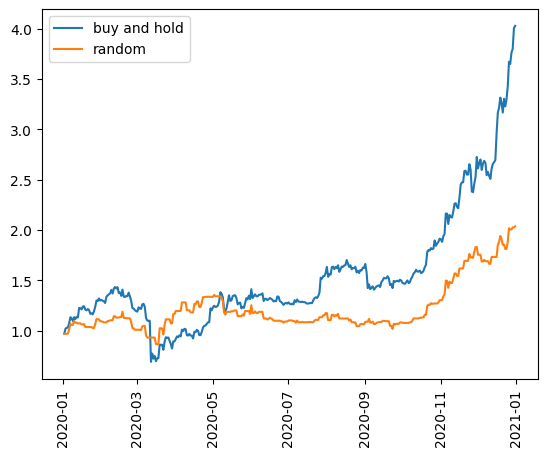

In [8]:
plt.plot(data['buy_and_hold'], label='buy and hold')
plt.plot(data['random'], label='random')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [9]:
print(round(data['buy_and_hold'][-1],2)) # ค่าผลตอบแทนของการซื้อและถือ
print(round(data['random'][-1],2)) # ค่าผลตอบแทนของการซื้อและถือที่สุ่ม

4.03
2.04


/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_4605/342086048.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(data['buy_and_hold'][-1],2)) # ค่าผลตอบแทนของการซื้อและถือ
/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_4605/342086048.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(data['random'][-1],2)) # ค่าผลตอบแทนของการซื้อและถือที่สุ่ม


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume,returns,buy_and_hold,position,random
Date,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,1,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-0.029819,0.970181,1,0.970181
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.051452,1.020098,0,0.970181
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.008955,1.029233,0,0.970181
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.000089,1.029325,1,0.970267
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,-0.006231,3.648842,1,2.005213
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,0.030927,3.761688,0,2.005213
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,0.010250,3.800247,1,2.025767
